In [ ]:
 import os
 os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d deepaksirohiwal/delhi-air-quality

  0% 0.00/423k [00:00<?, ?B/s]
100% 423k/423k [00:00<00:00, 92.9MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  delhi-air-quality.zip
  inflating: delhi_aqi.csv           


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("delhi_aqi.csv")

In [ ]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
data.shape


(18776, 9)

In [ ]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)

In [ ]:
data['date']

In [ ]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday']=data['date'].dt.day_name()
data['hour'] = data['date'].dt.hour

In [ ]:
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
data['seasons']=data['month'].map(seasons)

In [ ]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,weekday,hour,seasons
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,25,Wednesday,1,Autumn
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,25,Wednesday,2,Autumn
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,11,25,Wednesday,3,Autumn
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,11,25,Wednesday,4,Autumn
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,11,25,Wednesday,5,Autumn


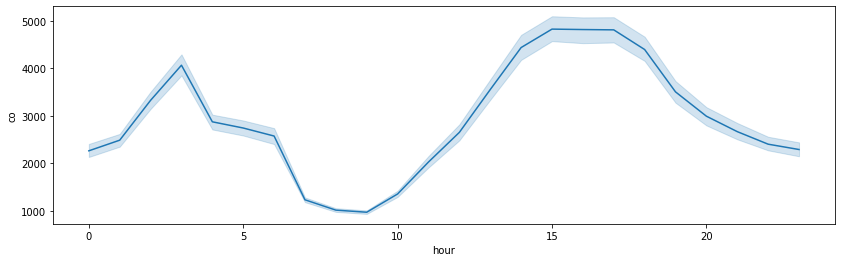

In [ ]:
# CO during different hours 
plt.figure(figsize=(14,4))
sns.lineplot(x='hour', y='co', data=data)
plt.show()

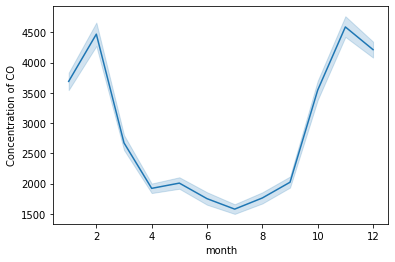

In [ ]:
# CO during different months
sns.lineplot(x='month', y='co', data=data)

plt.xlabel('month')
plt.ylabel('Concentration of CO')

plt.show()

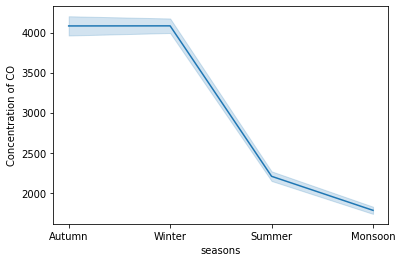

In [ ]:
# CO during diffrent seasons
sns.lineplot(x='seasons', y='co', data=data)

plt.xlabel('seasons')
plt.ylabel('Concentration of CO')

plt.show()

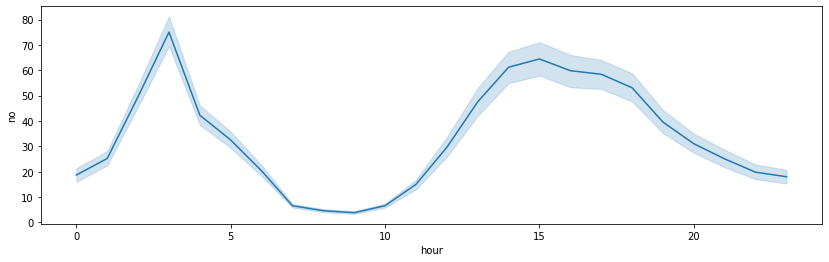

In [ ]:
# NO during different hours 
plt.figure(figsize=(14,4))
sns.lineplot(x='hour', y='no', data=data)
plt.show()

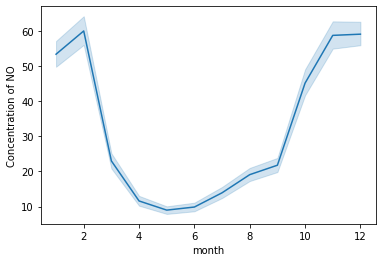

In [ ]:
# NO during different months
sns.lineplot(x='month', y='no', data=data)

plt.xlabel('month')
plt.ylabel('Concentration of NO')

plt.show()

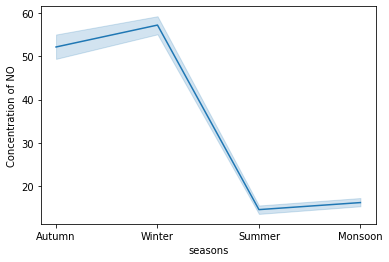

In [ ]:
# NO concentrations over seasons 
sns.lineplot(x='seasons', y='no', data=data)

plt.xlabel('seasons')
plt.ylabel('Concentration of NO')

plt.show()

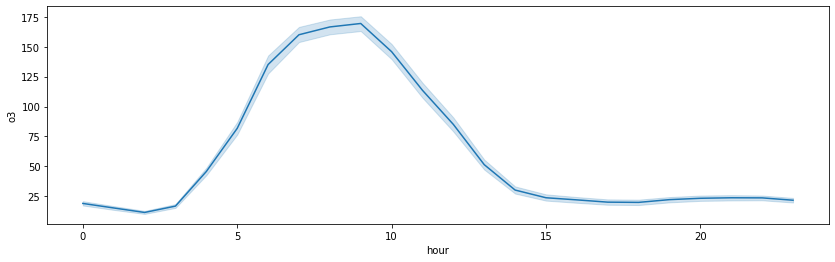

In [ ]:
# ground level ozone (o3) during different hours 
plt.figure(figsize=(14,4))
sns.lineplot(x='hour', y='o3', data=data)
plt.show()

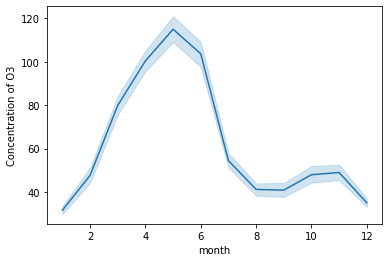

In [ ]:
# O3 during different months
sns.lineplot(x='month', y='o3', data=data)

plt.xlabel('month')
plt.ylabel('Concentration of O3')

plt.show()

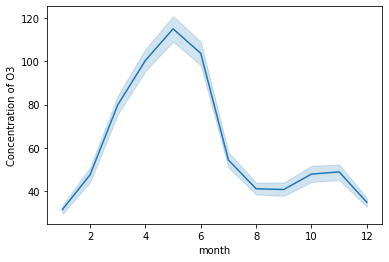

In [ ]:
# O3 during different seasons
sns.lineplot(x='month', y='o3', data=data)

plt.xlabel('month')
plt.ylabel('Concentration of O3')

plt.show()

In [ ]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
aq=data.copy()
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['pm10'].mean()
    l1.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['pm2_5'].mean()
    l2.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['nh3'].mean()
    l3.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['no'].mean()
    l4.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['co'].mean()
    l5.append(mpm)

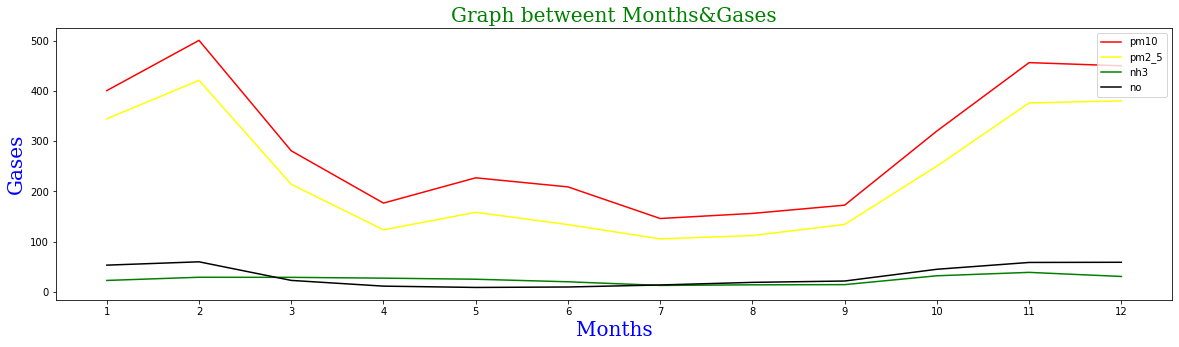

In [ ]:
a=np.array(aq.month.unique())
a.sort()
a
plt.figure(figsize=(20,5))
plt.plot(a,l1,color = 'red' )
plt.plot(a,l2,color = 'yellow')
plt.plot(a,l3,color = 'green')
plt.plot(a,l4,color = 'black')
plt.title("Graph betweent Months&Gases", fontdict = {'family':'serif','color':'green','size':20})
plt.xlabel("Months", fontdict = {'family':'serif','color':'blue','size':20})
plt.ylabel("Gases", fontdict = {'family':'serif','color':'blue','size':20})
plt.legend(["pm10",'pm2_5','nh3','no'], loc ="upper right")
plt.xticks(a);

In [ ]:
data.groupby(by='seasons')['co','no','no2','o3','so2','pm2_5','pm10','nh3'].mean()

<ipython-input-37-62f486531eae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='seasons')['co','no','no2','o3','so2','pm2_5','pm10','nh3'].mean()


,co,no,no2,o3,so2,pm2_5,pm10,nh3
seasons,,,,,,,,
Autumn,4083.866190,52.139391,86.868066,48.498531,74.120567,315.099684,390.237642,35.701133
Monsoon,1779.134249,16.192462,50.773140,59.885308,64.103113,121.472237,170.878523,15.519487
Summer,2204.470138,14.566655,56.644608,98.394106,63.858567,165.833062,228.743983,27.296714
Winter,4084.928259,57.201441,78.738604,36.818055,67.561591,376.871739,443.993768,27.576034


In [ ]:
#descriptive statistics
data[['co','no','no2','o3','so2','pm2_5','pm10','nh3']].describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


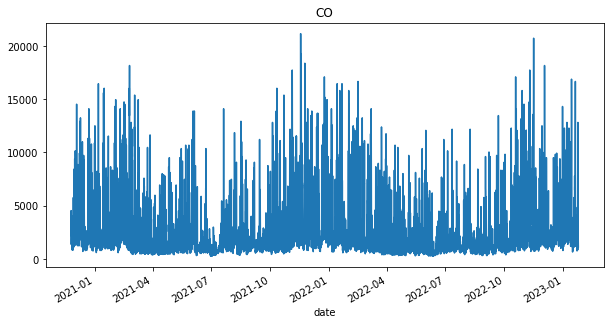

In [ ]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
data_new=data.set_index('date')
data_new['co'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='CO')
plt.show()

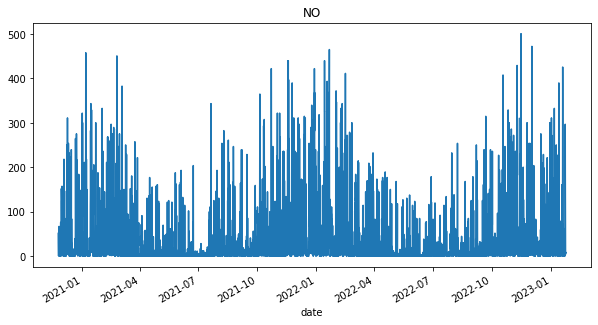

In [ ]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
data_new=data.set_index('date')
data_new['no'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='NO')
plt.show()

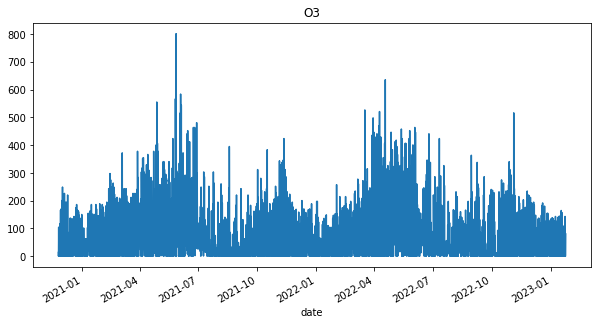

In [ ]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
data_new=data.set_index('date')
data_new['o3'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='O3')
plt.show()

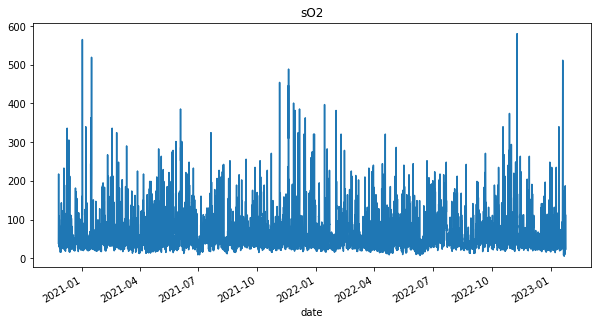

In [ ]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
data_new=data.set_index('date')
data_new['so2'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='sO2')
plt.show()